# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv', index_col = 0, parse_dates=[0])
df.columns = ['NumPass']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
NumPass    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [24]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts):
    ts.plot()
    p = []
    for column in ts.columns:
        dftest = adfuller(ts[column])
        p.append(dftest[1])
        
    if any([t>0.05 for t in p]):
        return 'Non Stationarity Detected', p
    else:
        return 'Stationarity Achieved', p
    

Use your newly created function on the airpassenger data set.

'Non Stationarity Detected'

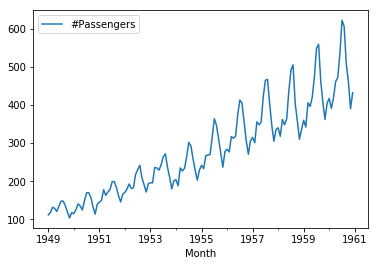

In [16]:
# Code here
stationarity_check(df)

## Perform a log() and sqrt() transform

'Non Stationarity Detected'

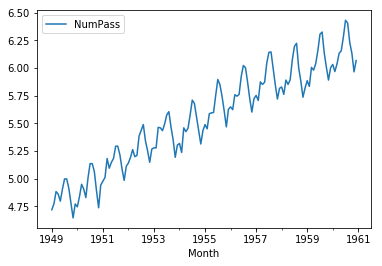

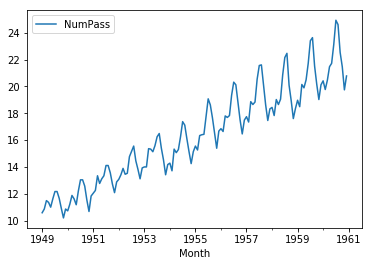

In [18]:
# Log transform timeseries and compare with original to check the effect
df_log = df.copy()
df_log.NumPass = df_log.NumPass.apply(np.log)
df_sqrt = df.copy()
df_sqrt.NumPass = df_sqrt.NumPass.apply(np.sqrt)


stationarity_check(df_log)
stationarity_check(df_sqrt)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

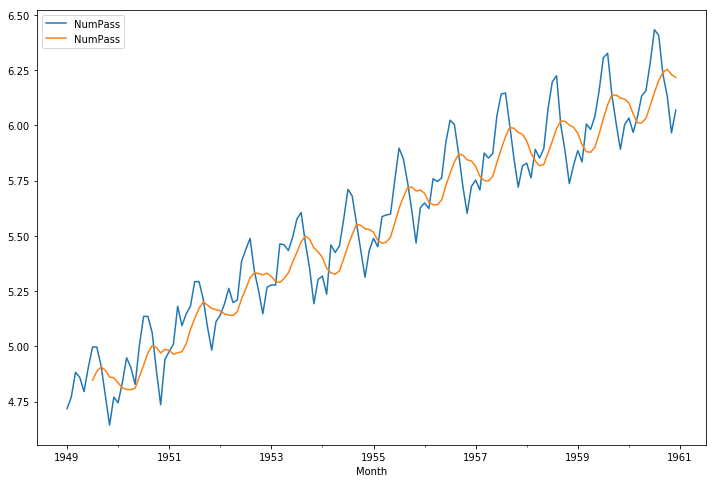

In [19]:
# your code here
ax = df_log.plot(figsize = (12,8))
ax = df_log.rolling(7).mean().plot(ax = ax)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [20]:
# Subtract the moving average from the original data and check head for Nans
df2 = df_log-df_log.rolling(7).mean()

In [21]:
# Drop the NaN values from timeseries calculated above
df2.dropna(inplace = True)

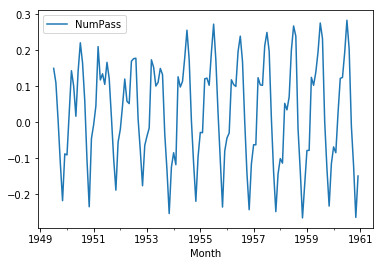

In [22]:
# Plot the result
df2.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

('Non Stationarity Detected', [0.15694559814096393])

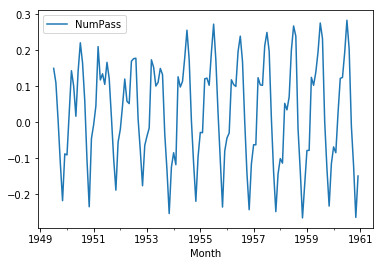

In [25]:
# Your code here
stationarity_check(df2)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
Visually it looks non-stationary. However, the DF test fails to reject the hypothesis at $\alpha$ = 0.05. I'll trust my judgement and say that this is stationary.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

In [27]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
df3 = df_log-df_log.ewm(halflife=2).mean()
# Plot the original data with exp weighted average


In [11]:
# Subtract the moving average from the original data and plot

('Stationarity Achieved', [0.02747727665601747])

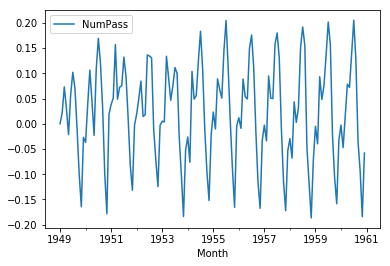

In [28]:
# do a stationarity check
stationarity_check(df3)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [34]:
# difference your data and look at the head
df4 = df.diff(periods = 1)
df4.dropna(inplace = True)

In [14]:
# plot your differenced time series

In [15]:
# drop nas

('Non Stationarity Detected', [0.05421329028382711])

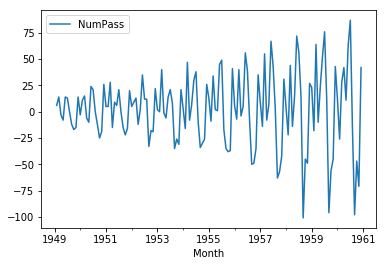

In [35]:
# perform the stationarity check
stationarity_check(df4)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.